In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor

In [ ]:
data = pd.read_csv("covid_dataset.csv",parse_dates = ['Day'],index_col = 'Day')

In [ ]:
data.head()

,Lab Test,Confirmed case,Death Case
Day,,,
2020-04-04,434,9,2
2020-04-05,367,18,1
2020-04-06,468,35,3
2020-04-07,679,41,5
2020-04-08,981,54,3


In [ ]:
print("Number of Rows:",data.shape[0])

Number of Rows: 626


In [ ]:
print("Number of Columns:",data.shape[1])

Number of Columns: 3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 626 entries, 2020-04-04 to 2021-12-20
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lab Test        626 non-null    int64
 1   Confirmed case  626 non-null    int64
 2   Death Case      626 non-null    int64
dtypes: int64(3)
memory usage: 19.6 KB


In [ ]:
data.isnull().sum()

Lab Test          0
Confirmed case    0
Death Case        0
dtype: int64

In [ ]:
dup_value = data.duplicated().any()

In [ ]:
dup_value

False

In [ ]:
data.describe()

,Lab Test,Confirmed case,Death Case
count,626.000000,626.000000,626.000000
mean,18033.835463,2526.009585,44.798722
std,9357.619008,2936.765446,54.528270
min,367.000000,9.000000,0.000000
25%,12869.500000,657.750000,14.000000
50%,15557.000000,1637.000000,30.000000
75%,20982.750000,2953.500000,44.000000
max,55284.000000,16230.000000,264.000000


In [ ]:
data.corr()

,Lab Test,Confirmed case,Death Case
Lab Test,1.000000,0.802410,0.784627
Confirmed case,0.802410,1.000000,0.931488
Death Case,0.784627,0.931488,1.000000


**Univariate Analysis**

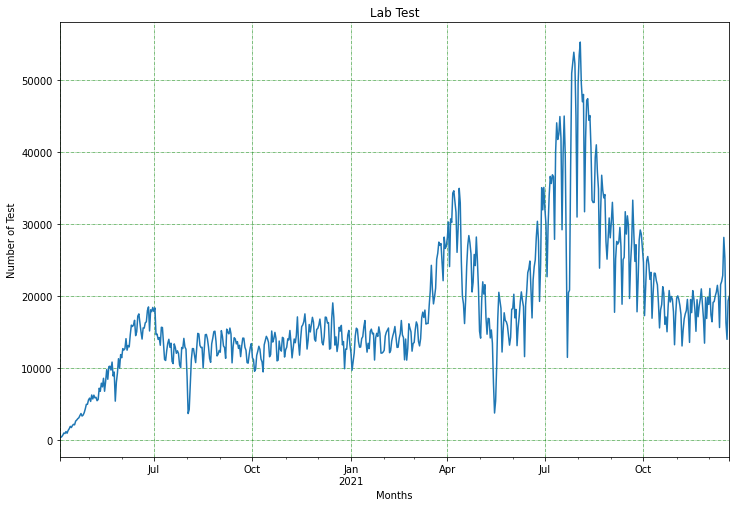

In [ ]:
data['Lab Test'].plot(figsize=(12,8))
plt.title("Lab Test")
plt.xlabel("Months")
plt.ylabel("Number of Test")
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.5)

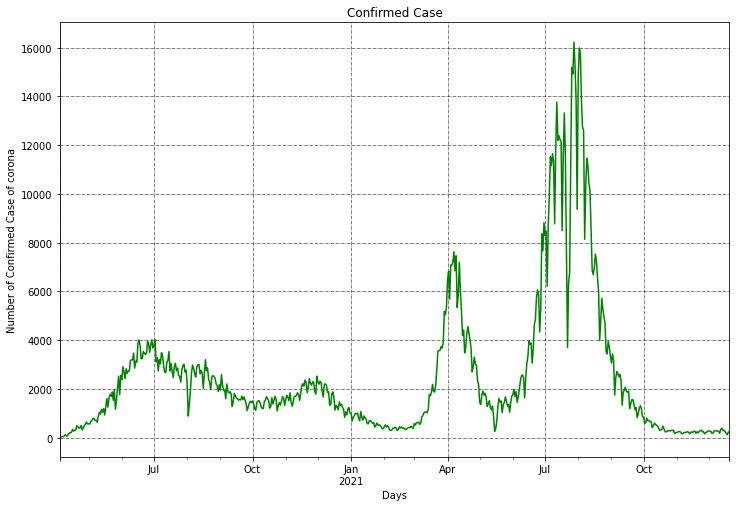

In [ ]:
data['Confirmed case'].plot(figsize=(12,8),color ='green')
plt.title("Confirmed Case")
plt.xlabel("Days")
plt.ylabel("Number of Confirmed Case of corona")
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.5)

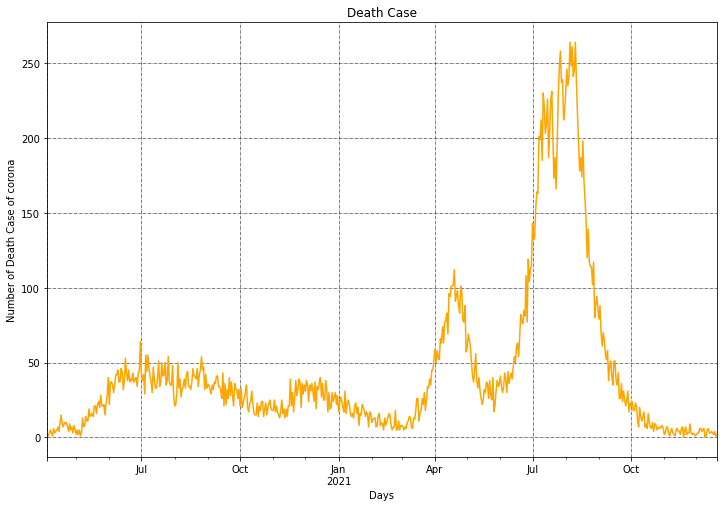

In [ ]:
data['Death Case'].plot(figsize=(12,8),color ='orange')
plt.title("Death Case")
plt.xlabel("Days")
plt.ylabel("Number of Death Case of corona")
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


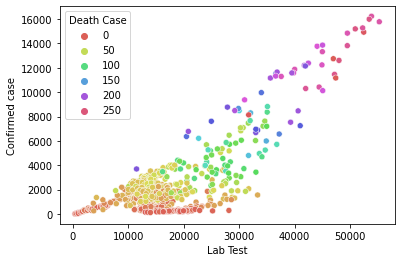

In [ ]:
sns.scatterplot(data['Lab Test'],data['Confirmed case'],hue = data['Death Case'],palette = "hls")

Text(0.5, 0, 'Day')

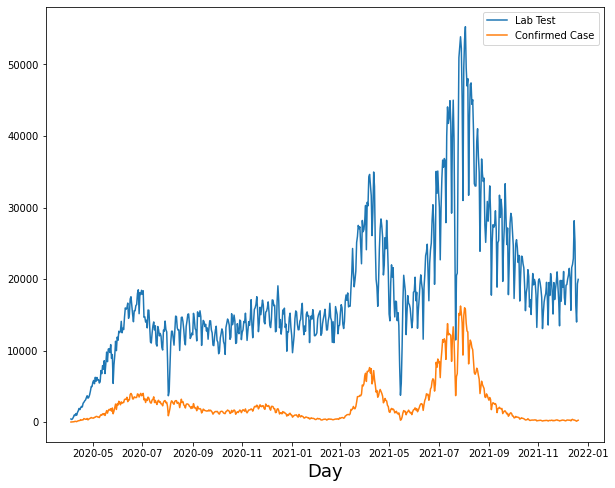

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data['Lab Test'],label = 'Lab Test')
plt.plot(data['Confirmed case'],label = 'Confirmed Case')
plt.legend()
plt.xlabel('Day',fontsize =18)

Text(0.5, 0, 'Day')

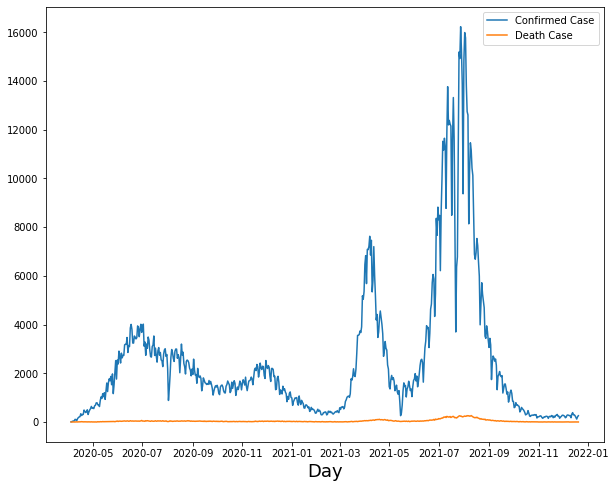

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data['Confirmed case'],label = 'Confirmed Case')
plt.plot(data['Death Case'],label = 'Death Case')
plt.legend()
plt.xlabel('Day',fontsize =18)

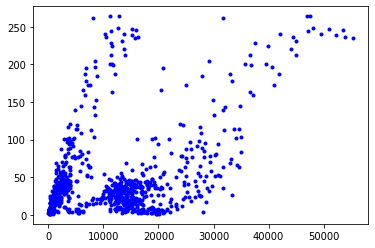

In [ ]:
plt.plot(X1_train,Y1_train,'b.')

In [ ]:
X1 = data[['Lab Test','Confirmed case']]
Y1 = data['Death Case']

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.2, random_state=0)

In [ ]:
model = RandomForestClassifier(n_estimators = 37)

In [ ]:
model.fit(X1_train,Y1_train)

RandomForestClassifier(n_estimators=37)

In [ ]:
model.score(X1_test,Y1_test)

0.07142857142857142

In [ ]:
regressor = LinearRegression()
regressor.fit(X1_train,Y1_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

-6.719271220343472
[0.00068305 0.0154915 ]


In [ ]:
Y1_pred = regressor.predict(X1_test)


In [ ]:
compare_dataset = (pd.DataFrame({'Actual': Y1_test, 'Predicted':Y1_pred}))

In [ ]:
compare_dataset.head()


,Actual,Predicted
Day,,
2021-03-26,33,69.819058
2021-01-28,15,11.295542
2021-06-03,30,31.007622
2021-02-11,9,10.531982
2021-06-07,30,35.526277


In [ ]:
print("R-squared: ",metrics.r2_score(compare_dataset.Actual,compare_dataset.Predicted))

R-squared:  0.8693318657516167


In [ ]:
poly = PolynomialFeatures(degree = 3, include_bias=True)

In [ ]:
X_train_trans = poly.fit_transform(X1_train)
X_test_trans = poly.fit_transform(X1_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_trans,Y1_train)

LinearRegression()

In [ ]:
y_prediction = model.predict(X_test_trans)

In [ ]:
metrics.r2_score(Y1_test,y_prediction)

0.8978235035695175